In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.dpi'] = 150

In [3]:
def read_data(path, filename, nmin, nmax, m_min, m_max):
    df = pd.read_csv(path + "/" + filename)
    df = df[(df['N'] >= nmin) & (df['N'] <= nmax)]
    
    # Create a mask for all conditions at once
    mask = ( (df['M'] >= df['N'].map(m_min)) & (df['M'] <= df['N'].map(m_max)) )
    
    return df[mask]

In [4]:
def plot_model_curve(data, figname, xlim, ylim, cd, cs, q, extra_label):
    N_list = sorted(data['N'].unique())
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for i in range(len(N_list)):
        N = N_list[i]
        color = color_cycle[i % len(color_cycle)]
        data_N = data[data['N'] == N]
        solved_list = []
        c_vals = []
        for M in data_N['M'].unique():
            c_vals.append(M / N * 2)
            data_NM = data_N[data_N['M'] == M]
            solved_list.append(data_NM[data_NM['E'] == 0].shape[0] / data_NM.shape[0])
        std_list = list(map(lambda x: np.sqrt(x *(1 - x) / N), solved_list))
        plt.errorbar(c_vals, solved_list, yerr=std_list, fmt='o', label=f'N={N}', c=color, linestyle='-')

    plt.vlines(cd, ymin=ylim[0], ymax=ylim[1], color='black', linestyle='--')
    plt.vlines(cs, ymin=ylim[0], ymax=ylim[1], color='black', linestyle='--')
    plt.text(cd + 0.05, 0.25, r'$c_d$', fontsize=14, color='black')
    plt.text(cs + 0.05, 0.25, r'$c_s$', fontsize=14, color='black')
    plt.title("q = " + str(q) + "   " + extra_label, fontsize=18)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('c', fontsize=18)
    plt.xticks(fontsize=14)
    plt.ylabel('P(SAT)', fontsize=18)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14, loc='best')
    plt.tight_layout()
    plt.savefig(figname, dpi=1000)
    plt.show()

# 3-COL


In [29]:
q = 3
cd = 4
cs = 4.678
cmin = 3.32
cmax = 4.96
path = f'/media/david/Data/UH/Grupo_de_investigacion/Hard_benchmarks/Coloring/PI-GNN/Results/Recurrent/random_graphs/Mixed/q_{q}/Stats/'

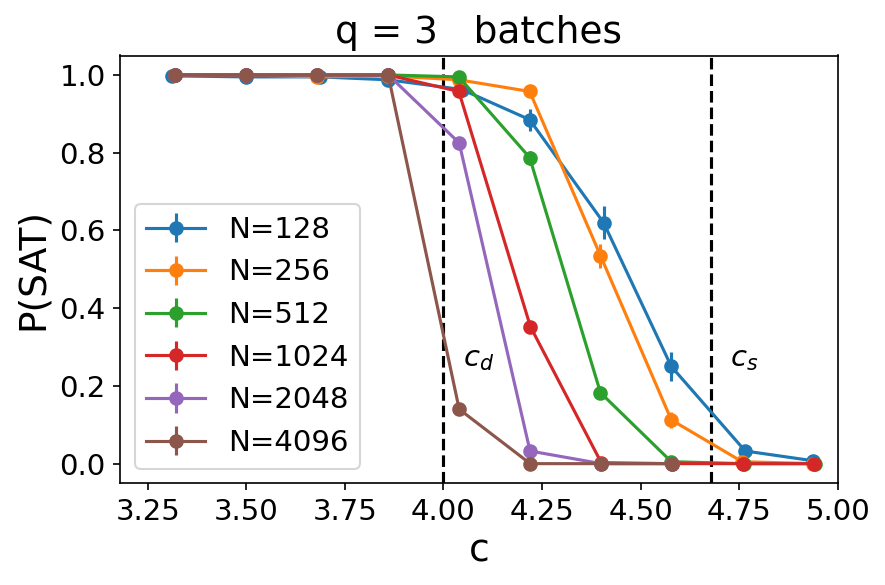

In [21]:
exp_min = 7
exp_max = 12
nmin = 2 ** exp_min
nmax = 2 ** exp_max
m_min = {}
m_max = {}
for exp in range(exp_min, exp_max + 1):
    m_min[2 ** exp] = int(round(2 ** exp * cmin / 2))
    m_max[2 ** exp] = int(round(2 ** exp * cmax / 2))
ntrials = 5
filename = f'{q}COL_rPI-GNN_ntrials={ntrials}.csv'
figname = f'{path}/Coloring_q_{q}_rPI-GNN_ntrials_{ntrials}_nmin_{nmin}_nmax_{nmax}.png'
df3 = read_data(path, filename, nmin, nmax, m_min, m_max)
xlim = (3.18, 5.0)
ylim = (-0.05, 1.05)
extra_label = "batches"
plot_model_curve(df3, figname, xlim, ylim, cd, cs, q, extra_label)

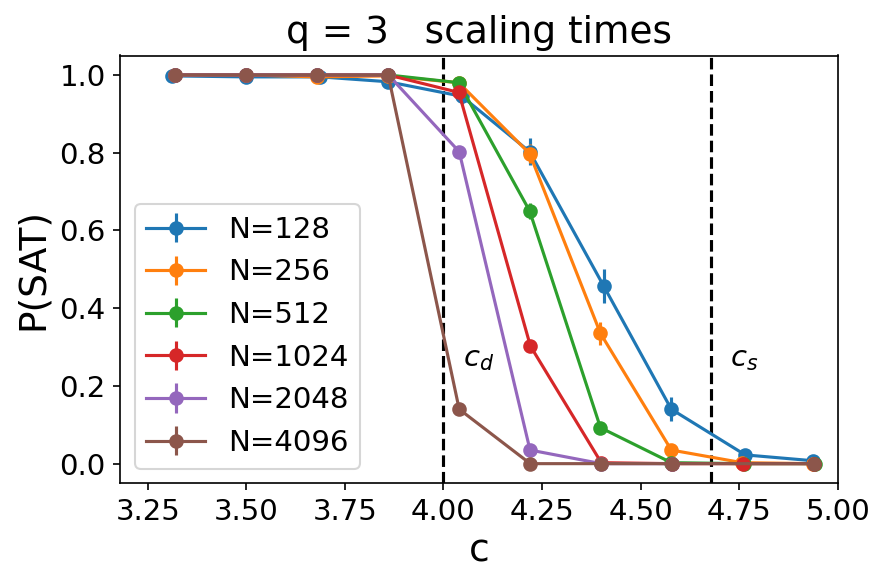

In [30]:
exp_min = 7
exp_max = 12
nmin = 2 ** exp_min
nmax = 2 ** exp_max
m_min = {}
m_max = {}
for exp in range(exp_min, exp_max + 1):
    m_min[2 ** exp] = int(round(2 ** exp * cmin / 2))
    m_max[2 ** exp] = int(round(2 ** exp * cmax / 2))
ntrials = 5
filename = f'{q}COL_rPI-GNN_ntrials={ntrials}_new.csv'
figname = f'{path}/Coloring_q_{q}_rPI-GNN_ntrials_{ntrials}_nmin_{nmin}_nmax_{nmax}_scaling_times.png'
df3 = read_data(path, filename, nmin, nmax, m_min, m_max)
xlim = (3.18, 5.0)
ylim = (-0.05, 1.05)
extra_label = "scaling times"
plot_model_curve(df3, figname, xlim, ylim, cd, cs, q, extra_label)

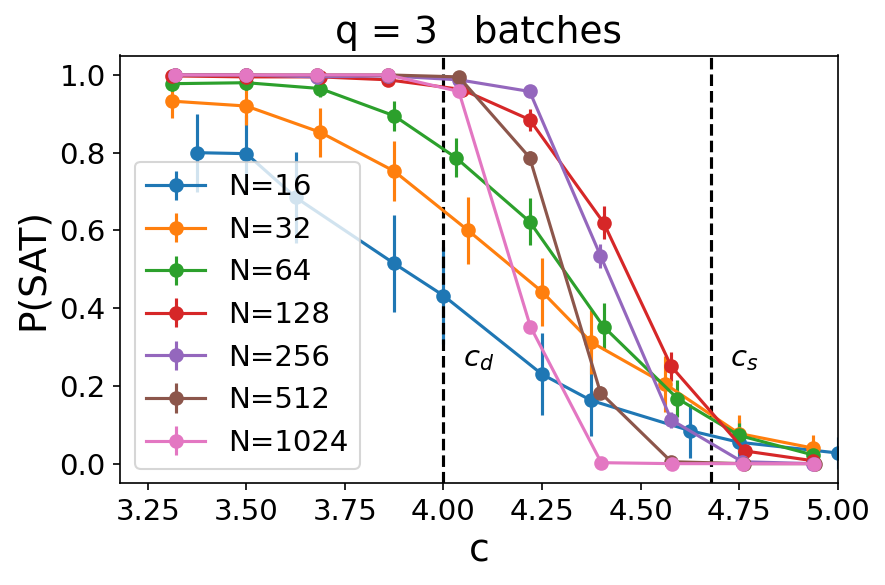

In [23]:
exp_min = 4
exp_max = 10
nmin = 2 ** exp_min
nmax = 2 ** exp_max
m_min = {}
m_max = {}
for exp in range(exp_min, exp_max + 1):
    m_min[2 ** exp] = int(round(2 ** exp * cmin / 2))
    m_max[2 ** exp] = int(round(2 ** exp * cmax / 2))
ntrials = 5
filename = f'{q}COL_rPI-GNN_ntrials={ntrials}.csv'
figname = f'{path}/Coloring_q_{q}_rPI-GNN_ntrials_{ntrials}_nmin_{nmin}_nmax_{nmax}.png'
df3 = read_data(path, filename, nmin, nmax, m_min, m_max)
xlim = (3.18, 5.0)
ylim = (-0.05, 1.05)
extra_label = "batches"
plot_model_curve(df3, figname, xlim, ylim, cd, cs, q, extra_label)

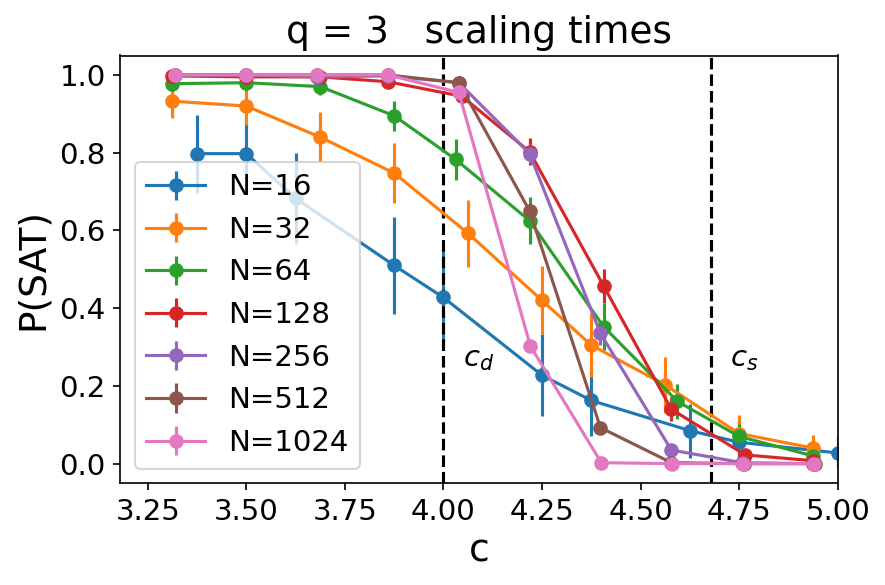

In [24]:
exp_min = 4
exp_max = 10
nmin = 2 ** exp_min
nmax = 2 ** exp_max
m_min = {}
m_max = {}
for exp in range(exp_min, exp_max + 1):
    m_min[2 ** exp] = int(round(2 ** exp * cmin / 2))
    m_max[2 ** exp] = int(round(2 ** exp * cmax / 2))
ntrials = 5
filename = f'{q}COL_rPI-GNN_ntrials={ntrials}_new.csv'
figname = f'{path}/Coloring_q_{q}_rPI-GNN_ntrials_{ntrials}_nmin_{nmin}_nmax_{nmax}_scaling_times.png'
df3 = read_data(path, filename, nmin, nmax, m_min, m_max)
xlim = (3.18, 5.0)
ylim = (-0.05, 1.05)
extra_label = "scaling times"
plot_model_curve(df3, figname, xlim, ylim, cd, cs, q, extra_label)

# 5-COL

In [31]:
q = 5
cd = 12.837
cs = 13.669
cmin = 9.9
cmax = 13.5
path = f'/media/david/Data/UH/Grupo_de_investigacion/Hard_benchmarks/Coloring/PI-GNN/Results/Recurrent/random_graphs/Mixed/q_{q}/Stats/'

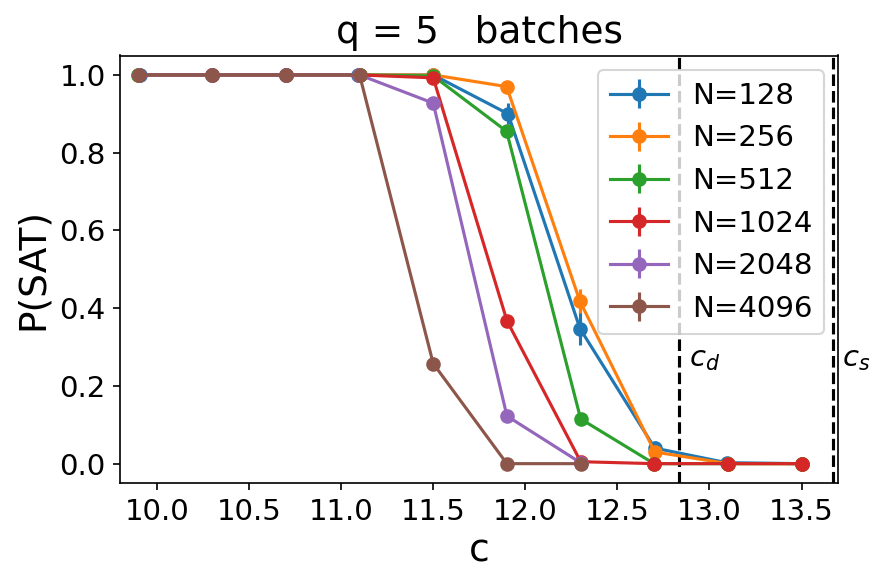

In [33]:
exp_min = 7
exp_max = 12
nmin = 2 ** exp_min
nmax = 2 ** exp_max
m_min = {}
m_max = {}
for exp in range(exp_min, exp_max + 1):
    m_min[2 ** exp] = int(round(2 ** exp * cmin / 2))
    m_max[2 ** exp] = int(round(2 ** exp * cmax / 2))
ntrials = 5
filename = f'{q}COL_rPI-GNN_ntrials={ntrials}.csv'
figname = f'{path}/Coloring_q_{q}_rPI-GNN_ntrials_{ntrials}_nmin_{nmin}_nmax_{nmax}.png'
df5 = read_data(path, filename, nmin, nmax, m_min, m_max)
xlim = (9.8, 13.7)
ylim = (-0.05, 1.05)
extra_label = "batches"
plot_model_curve(df5, figname, xlim, ylim, cd, cs, q, extra_label)

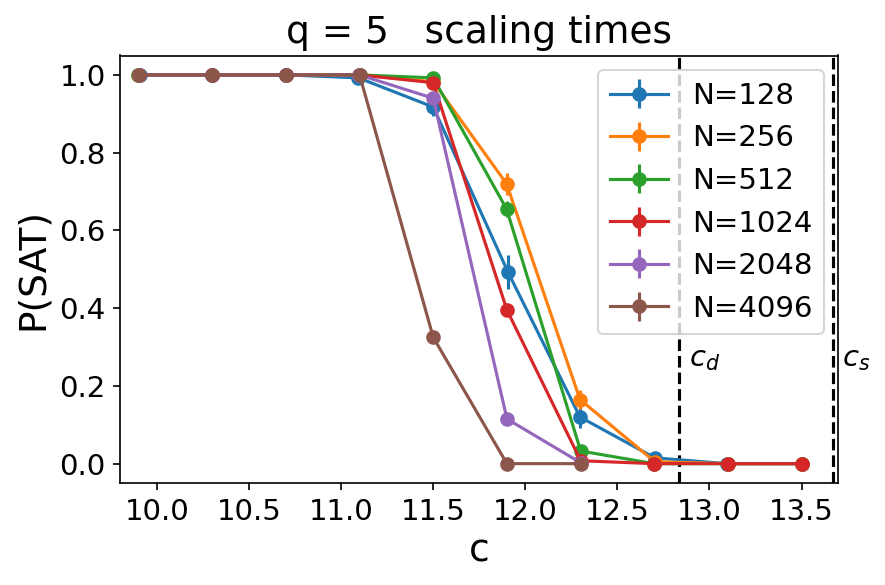

In [32]:
exp_min = 7
exp_max = 12
nmin = 2 ** exp_min
nmax = 2 ** exp_max
m_min = {}
m_max = {}
for exp in range(exp_min, exp_max + 1):
    m_min[2 ** exp] = int(round(2 ** exp * cmin / 2))
    m_max[2 ** exp] = int(round(2 ** exp * cmax / 2))
ntrials = 5
filename = f'{q}COL_rPI-GNN_ntrials={ntrials}_new.csv'
figname = f'{path}/Coloring_q_{q}_rPI-GNN_ntrials_{ntrials}_nmin_{nmin}_nmax_{nmax}_scaling_times.png'
df5 = read_data(path, filename, nmin, nmax, m_min, m_max)
xlim = (9.8, 13.7)
ylim = (-0.05, 1.05)
extra_label = "scaling times"
plot_model_curve(df5, figname, xlim, ylim, cd, cs, q, extra_label)

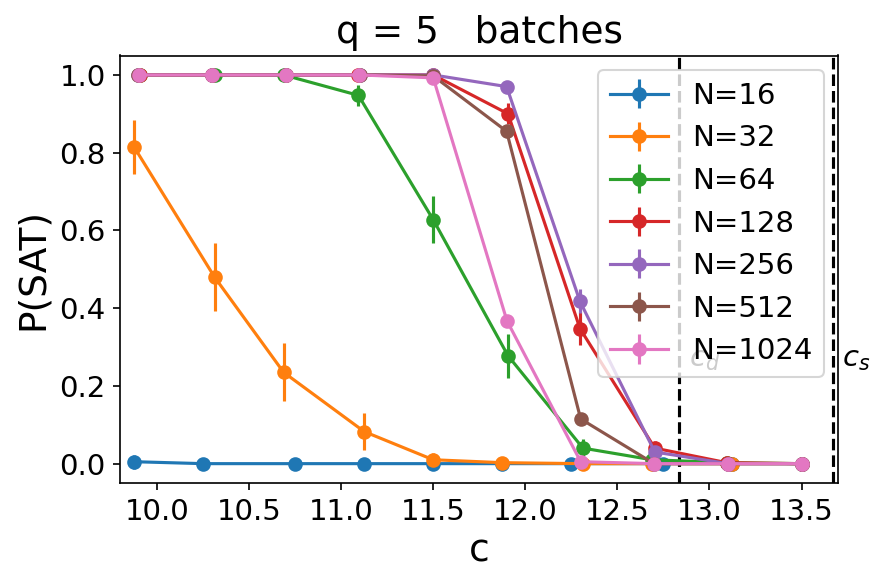

In [34]:
exp_min = 4
exp_max = 10
nmin = 2 ** exp_min
nmax = 2 ** exp_max
m_min = {}
m_max = {}
for exp in range(exp_min, exp_max + 1):
    m_min[2 ** exp] = int(round(2 ** exp * cmin / 2))
    m_max[2 ** exp] = int(round(2 ** exp * cmax / 2))
ntrials = 5
filename = f'{q}COL_rPI-GNN_ntrials={ntrials}.csv'
figname = f'{path}/Coloring_q_{q}_rPI-GNN_ntrials_{ntrials}_nmin_{nmin}_nmax_{nmax}.png'
df5 = read_data(path, filename, nmin, nmax, m_min, m_max)
xlim = (9.8, 13.7)
ylim = (-0.05, 1.05)
extra_label = "batches"
plot_model_curve(df5, figname, xlim, ylim, cd, cs, q, extra_label)

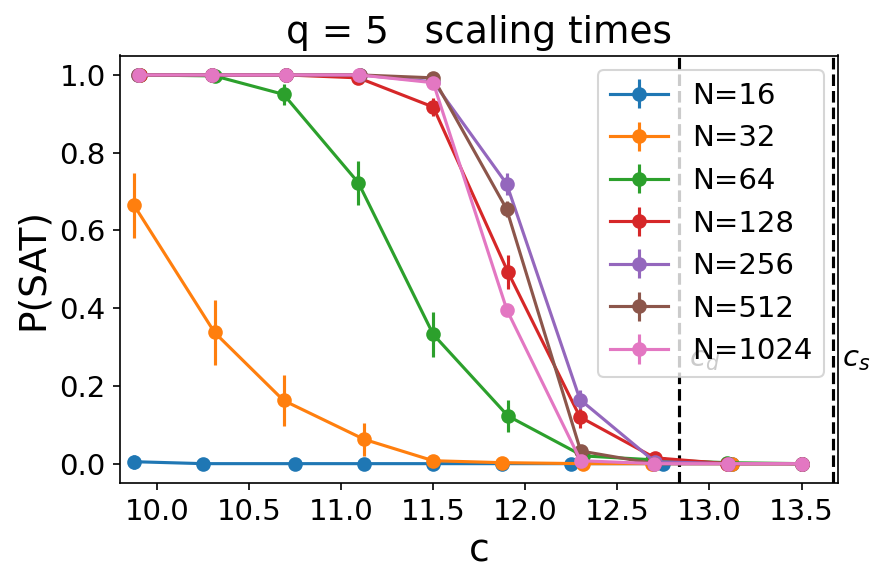

In [35]:
exp_min = 4
exp_max = 10
nmin = 2 ** exp_min
nmax = 2 ** exp_max
m_min = {}
m_max = {}
for exp in range(exp_min, exp_max + 1):
    m_min[2 ** exp] = int(round(2 ** exp * cmin / 2))
    m_max[2 ** exp] = int(round(2 ** exp * cmax / 2))
ntrials = 5
filename = f'{q}COL_rPI-GNN_ntrials={ntrials}_new.csv'
figname = f'{path}/Coloring_q_{q}_rPI-GNN_ntrials_{ntrials}_nmin_{nmin}_nmax_{nmax}_scaling_times.png'
df5 = read_data(path, filename, nmin, nmax, m_min, m_max)
xlim = (9.8, 13.7)
ylim = (-0.05, 1.05)
extra_label = "scaling times"
plot_model_curve(df5, figname, xlim, ylim, cd, cs, q, extra_label)